# Checking the cleaned data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gwpy.timeseries import TimeSeries
from gwpy.frequencyseries import FrequencySeries

## Upsampling and coloring
Check if upsampling and coloring are implemented correctly. Do that simply by comparing the cleaned data before upsampling/coloring and after.

In [3]:
# load data before upsampling/coloring
noise_tseries = np.load('output/noise_tseries.npy')
orig_tseries = np.load('output/original_tseries.npy')
clean_tseries_before = TimeSeries(orig_tseries[1,:] - noise_tseries[1,:], times=orig_tseries[0,:])

# load data after upsampling/coloring
clean_tseries_after = np.load('output/DCS-CALIB_STRAIN_CLEAN_C01_4096Hz_event_cleaned.npy')
clean_tseries_after = TimeSeries(clean_tseries_after[1, :], times=clean_tseries_after[0, :])

In [4]:
# plotting params
gps = 1264316116
crop_win = 20
start_crop = gps - crop_win
end_crop = gps + crop_win
plot_win = 3
start_plot = gps - plot_win
end_plot = gps + plot_win
tick_spacing = 1

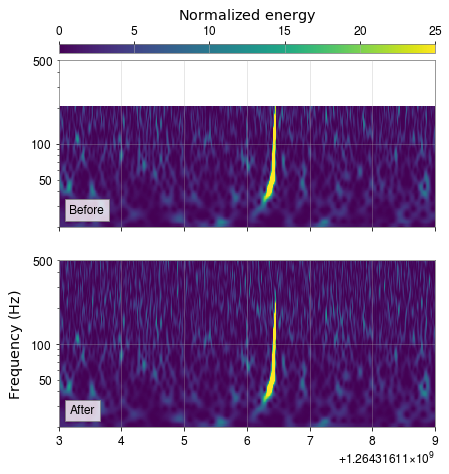

In [5]:
# crop data for faster q transforms
clean_tseries_before_cropped = clean_tseries_before.crop(start_crop, end_crop)
clean_tseries_after_cropped = clean_tseries_after.crop(start_crop, end_crop)

dataset = ['before','after']
q_trans = {}
q_trans['before'] = clean_tseries_before_cropped.q_transform(outseg=(start_plot,end_plot),qrange=(10,20))
q_trans['after'] = clean_tseries_after_cropped.q_transform(outseg=(start_plot,end_plot),qrange=(10,20))

ylim = (20, 500) 
alim = (0, 25)

label = {}
label['before'] = 'Before'
label['after'] = 'After'

plot, axes = plt.subplots(nrows=2, sharex=True, figsize=(3.375*2.0,3.375*2.0))

for i, ax in zip(dataset,axes):

    pcm = ax.imshow(q_trans[i],vmin=alim[0],vmax=alim[1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel('')
    ax.set_yscale('log')
    ax.plot([gps],10, label=label[i], visible=False)
    ax.grid(alpha=0.6)
    ax.legend(loc='lower left', handlelength=0, handletextpad=0)

axes[1].set_ylabel(r"$\mathrm{Frequency \ (Hz)}$")
cbar = axes[0].colorbar(clim=(alim[0], alim[1]),location='top')
cbar.set_label(r"$\mathrm{Normalized \ energy}$")
#plt.savefig(f'output/plots/event_oscan.png')

## Time series difference

In [6]:
plot_win = 50
start_plot = gps - plot_win
end_plot = gps + plot_win

orig_tseries_copy = TimeSeries(orig_tseries[1,:], times=orig_tseries[0,:])
orig_tseries_copy = orig_tseries_copy.crop(start_plot,end_plot)

noise_tseries_copy = TimeSeries(noise_tseries[1,:], times=noise_tseries[0,:])
noise_tseries_copy = noise_tseries_copy.crop(start_plot,end_plot)

clean_tseries_copy = orig_tseries_copy - noise_tseries_copy

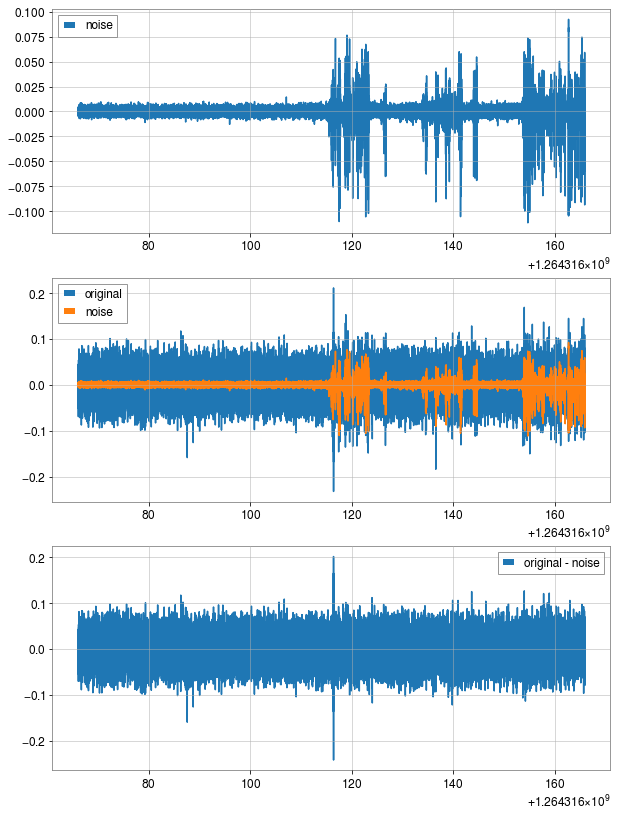

In [7]:
plt.figure(figsize=(10,14))
plt.subplot(3,1,1)
plt.plot(noise_tseries_copy, label='noise')
plt.legend()
plt.subplot(3,1,2)
plt.plot(orig_tseries_copy, label='original')
plt.plot(noise_tseries_copy, label='noise')
plt.legend()
plt.subplot(3,1,3)
plt.plot(clean_tseries_copy, label='original - noise')
plt.legend()
#plt.savefig(f'output/plots/training_{output_suffix}_tseries.png')

In [8]:
start_plot = gps - 1
end_plot = gps + 2

orig_tseries_copy = TimeSeries(orig_tseries[1,:], times=orig_tseries[0,:])
orig_tseries_copy = orig_tseries_copy.crop(start_plot,end_plot)

noise_tseries_copy = TimeSeries(noise_tseries[1,:], times=noise_tseries[0,:])
noise_tseries_copy = noise_tseries_copy.crop(start_plot,end_plot)

clean_tseries_copy = orig_tseries_copy - noise_tseries_copy

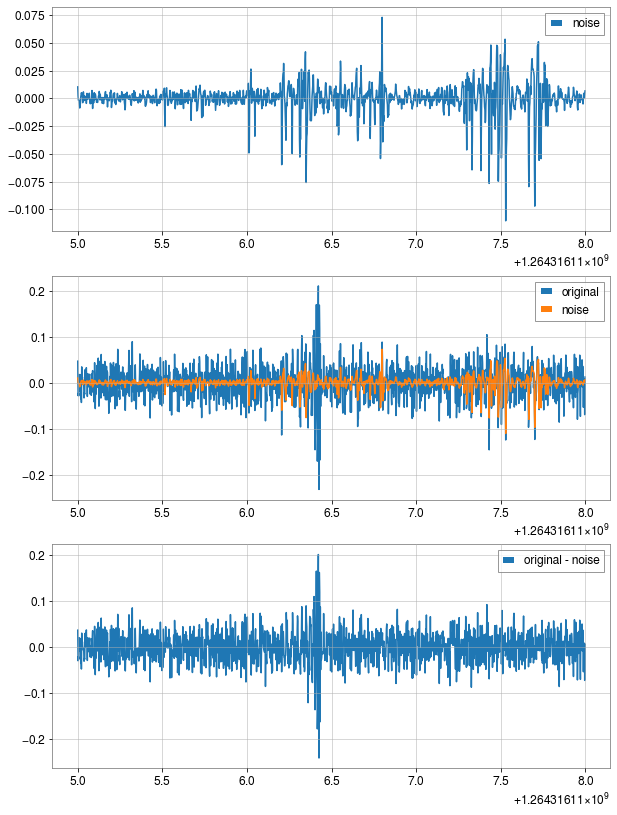

In [10]:
plt.figure(figsize=(10,14))
plt.subplot(3,1,1)
plt.plot(noise_tseries_copy, label='noise')
plt.legend()
plt.subplot(3,1,2)
plt.plot(orig_tseries_copy, label='original')
plt.plot(noise_tseries_copy, label='noise')
plt.legend()
plt.subplot(3,1,3)
plt.plot(clean_tseries_copy, label='original - noise')
plt.legend()
#plt.savefig(f'output/plots/training_{output_suffix}_tseries.png')

## Other checks
Using the same checks as in https://ldas-jobs.ligo.caltech.edu/~derek.davis/detchar/O3/followup/glitch_subtraction_check/linear_sub_S200129m/final/lin_sub_comparison.html

### ASDs

In [11]:
orig_data_full  = TimeSeries(orig_tseries[1,:], times=orig_tseries[0,:])
diff_data_full = TimeSeries(noise_tseries[1,:], times=noise_tseries[0,:])
sub_data_full = orig_data_full - diff_data_full


process_win = 64
orig_data = orig_data_full.copy().crop(gps-process_win,gps+process_win)
diff_data = diff_data_full.copy().crop(gps-process_win,gps+process_win)
sub_data = sub_data_full.copy().crop(gps-process_win,gps+process_win)

In [12]:
orig_asd = orig_data_full.asd(8,4)
sub_asd = sub_data_full.asd(8,4)
diff_asd = diff_data_full.asd(8,4)

orig_asd_zoom = orig_data.asd(8,4)
sub_asd_zoom = sub_data.asd(8,4)
diff_asd_zoom = diff_data.asd(8,4)

/home/jdo86av3c/bin/miniconda3/envs/nlsub/lib/python3.7/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


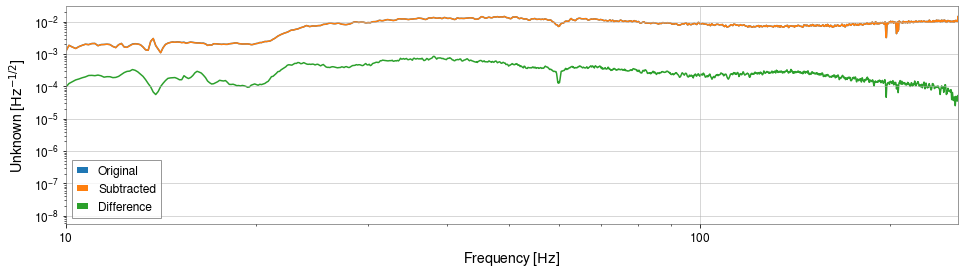

In [13]:
plot = orig_asd.plot(label='Original',figsize=[16,4])
ax = plot.gca()
ax.plot(sub_asd,label='Subtracted')
ax.plot(diff_asd,label='Difference')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10,256)
ax.legend()
plot.show()

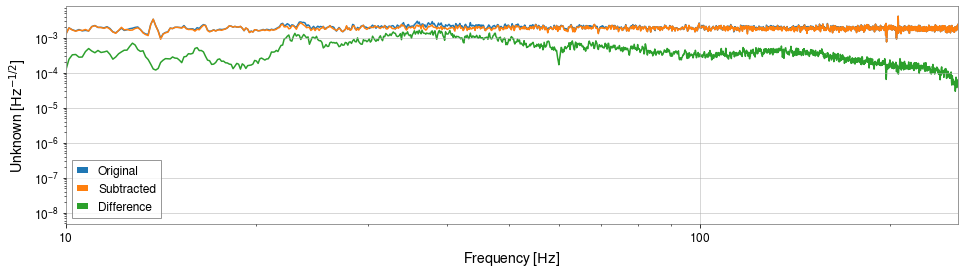

In [14]:
plot = orig_asd_zoom.plot(label='Original',figsize=[16,4])
ax = plot.gca()
ax.plot(sub_asd_zoom,label='Subtracted')
ax.plot(diff_asd_zoom,label='Difference')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10,256)
ax.legend()

### Ratio of ASDs

In [15]:
ratio  = sub_asd / orig_asd
ratio_zoom  = sub_asd_zoom / orig_asd_zoom

/home/jdo86av3c/bin/miniconda3/envs/nlsub/lib/python3.7/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


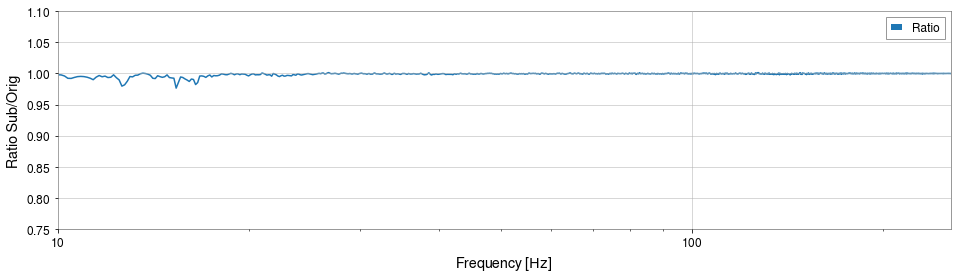

In [16]:
plot = ratio.plot(label='Ratio',figsize=[16,4])
ax = plot.gca()
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10,256)
ax.set_ylim(0.75,1.1)
ax.set_ylabel('Ratio Sub/Orig')
ax.legend()
#plot.savefig('asd_ratio1.png')
plot.show()

/home/jdo86av3c/bin/miniconda3/envs/nlsub/lib/python3.7/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


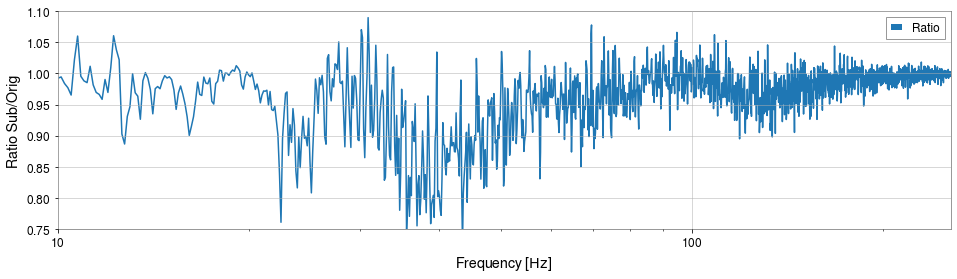

In [17]:
plot = ratio_zoom.plot(label='Ratio',figsize=[16,4])
ax = plot.gca()
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10,256)
ax.set_ylim(0.75,1.1)
ax.set_ylabel('Ratio Sub/Orig')
ax.legend()
#plot.savefig('asd_ratio4.png')
plot.show()

### Long duration specgrams

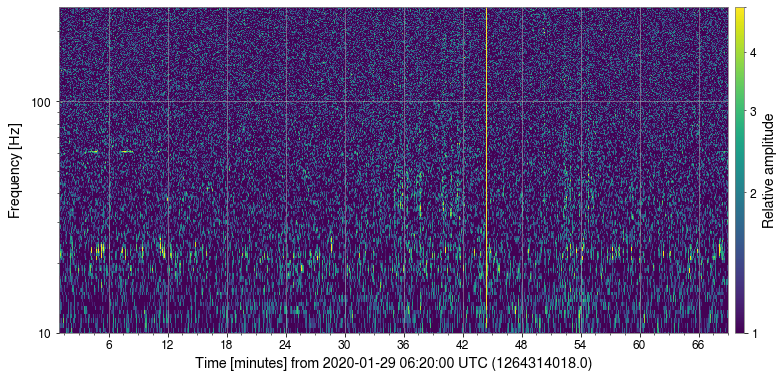

In [18]:
orig_spec = orig_data_full.spectrogram(2, fftlength=2, overlap=.5) ** (1/2.)
orig_normal = orig_spec.ratio('median')

plot = orig_normal.plot(norm='log', vmin=1., vmax=5, cmap='viridis')
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10,256)
ax.colorbar(label='Relative amplitude')
plot.show()

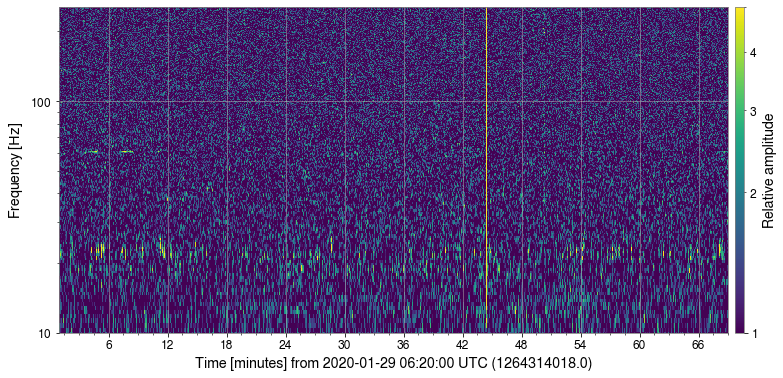

In [19]:
sub_spec = sub_data_full.spectrogram(2, fftlength=2, overlap=.5) ** (1/2.)
sub_normal = sub_spec.ratio('median')

plot = sub_normal.plot(norm='log', vmin=1., vmax=5, cmap='viridis')
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10,256)
ax.colorbar(label='Relative amplitude')
#plot.savefig('spectrogram_sub.png')
plot.show()

### Specgrams

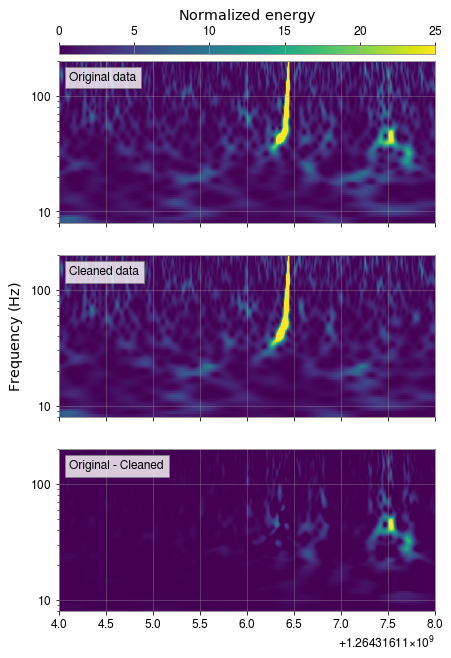

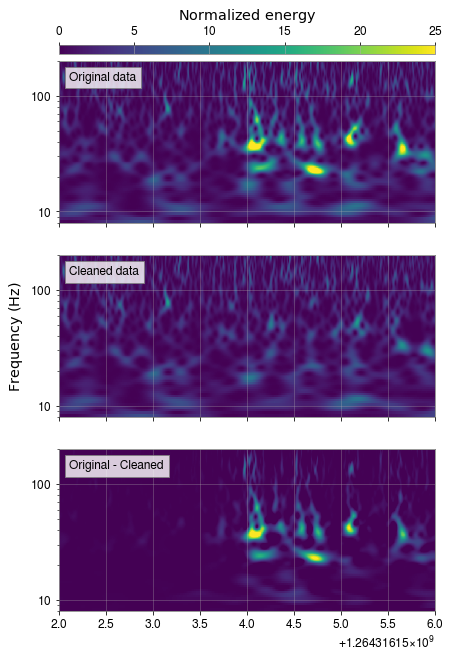

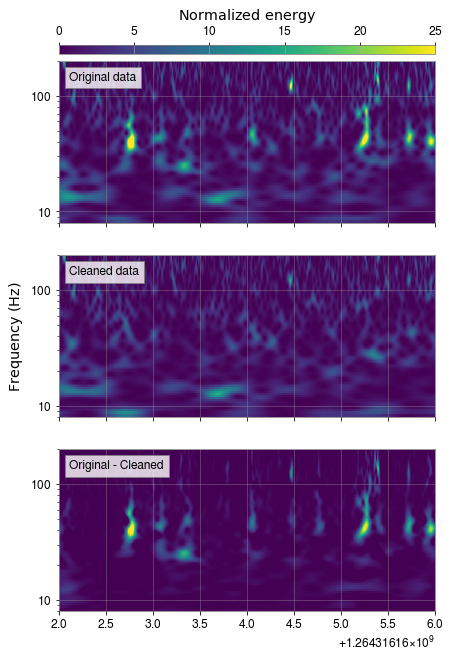

In [20]:
def make_oscan(gps, oscan_name):
    plot_win = 2
    start_plot = gps - plot_win
    end_plot = gps + plot_win

    dataset = ['orig','clean','diff']
    q_trans = {}
    q_trans['orig'] = orig_data.q_transform(outseg=(start_plot,end_plot),qrange=(10,20))
    q_trans['clean'] = sub_data.q_transform(outseg=(start_plot,end_plot),qrange=(10,20))
    #q_trans['diff'] = diff_data.q_transform(outseg=(start_plot,end_plot),qrange=(10,20))
    q_trans['diff'] = q_trans['orig'] - q_trans['clean']


    ylim = (8, 200) 
    alim = (0, 25)

    label = {}
    label['orig'] = 'Original data'
    label['clean'] = 'Cleaned data'
    label['diff'] = 'Original - Cleaned'

    plot, axes = plt.subplots(nrows=3, sharex=True, figsize=(3.375*2.0,3.375*3.0))

    for i, ax in zip(dataset,axes):

        pcm = ax.imshow(q_trans[i],vmin=alim[0],vmax=alim[1])
        #ax.set_xlim(xlim[0],xlim[1])
        ax.set_ylim(ylim[0],ylim[1])
        ax.set_xlabel('')
        ax.set_yscale('log')
        #cbar = ax.colorbar(clim=(0, 15))
        #cbar.set_label(r"$\mathrm{Normalized amplitude}$")
        ax.plot([gps],10, label=label[i], visible=False)
        ax.grid(alpha=0.6)
        ax.legend(loc='upper left', handlelength=0, handletextpad=0)

    axes[1].set_ylabel(r"$\mathrm{Frequency \ (Hz)}$")
    cbar = axes[0].colorbar(clim=(alim[0], alim[1]),location='top')
    cbar.set_label(r"$\mathrm{Normalized \ energy}$")
    #plt.savefig(f'plots/{oscan_name}.png')

gps = 1264316116
oscan_name = f'oscan_1'
make_oscan(gps, oscan_name)
gps = 1264316154
oscan_name = f'oscan_2'
make_oscan(gps, oscan_name)
gps = 1264316164
oscan_name = f'oscan_3'
make_oscan(gps, oscan_name)